In [2]:
#add song
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
#'shuffle_exclude/Love_Like_a_Sunset_Full_by_Phoenix.mp3',
song,dow,tm='shuffle_exclude/Love_Like_a_Sunset_Full_by_Phoenix.mp3',3,'8:52:30'
statement ='INSERT INTO {} (name,dow,time) VALUES (\"{}\",{},\"{}\")'.format(table,song,dow,tm)
con.execute(statement)
con.commit()
con.close()

In [3]:
#remove song
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
# (5, '15:00:00', 'go_betweens-Clouds.mp3')
# (2, '10:52:30', shuffle_exclude/Iron_Wine_-_Naked_as_We_Came_OFFICIAL_VIDEO.mp3 swap this out 20190702
dow,tm=24,'15:22:30'
statement ='DELETE FROM {} WHERE dow={} AND time="{}"'.format(table,dow,tm)
con.execute(statement)
con.commit()
con.close()

In [58]:
#update song
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
#"shuffle_exclude/Death_Cab_For_Cutie_-_Transatlanticism.mp3",
#song,dow,tm='CyndiLauper-GirlsJustWantToHaveFun.mp3',2,'16:00:00'
statement ='UPDATE {} SET name="Stone_Temple_Pilots_-_Interstate_Love_Song_Official_Music_Video.mp3" WHERE dow=2 AND time="19:00:00"'.format(table)
con.execute(statement)
con.commit()
con.close()

In [1]:
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
#statement="SELECT count(*) FROM {} ORDER BY dow ASC, time ASC".format(table)
statement="SELECT * FROM {} ORDER BY dow ASC, time ASC".format(table)
#statement="SELECT * FROM {} WHERE dow=5 ORDER BY dow ASC, time ASC".format(table)
cursor=con.execute(statement)
rows = cursor.fetchall()
for row in rows:
    print(row)    
con.close()

(0, '00:00:01', 'shuffle_exclude/Fleetwood_Mac_-_The_Chain.mp3')
(0, '00:07:30', 'shuffle_exclude/1._The_Hand_That_Rocks_The_Cradle_Demo_-_The_Smiths.mp3')
(0, '00:15:00', 'shuffle_exclude/wilco-moremoon.mp3')
(0, '00:22:30', 'shuffle_exclude/Whiskeytown_-_Losering.mp3')
(0, '00:30:00', 'shuffle_exclude/cat_power-Love&Communication.mp3')
(0, '00:45:00', 'shuffle_exclude/Radiohead_-_The_Gloaming_-_Live_From_The_Basement_HD.mp3')
(0, '01:00:00', 'shuffle_exclude/throwing_muses-Golden_Thing.mp3')
(0, '01:30:00', 'shuffle_exclude/TheCure-TheLastDayofSummer.mp3')
(0, '02:00:00', 'shuffle_exclude/Field_Mice-Sensitive.mp3')
(0, '02:30:00', 'shuffle_exclude/cat_power-EmptyShell.mp3')
(0, '03:00:00', 'shuffle_exclude/Tom_Verlaine-Spiritual.mp3')
(0, '04:00:00', 'shuffle_exclude/beck-Horrible_Fanfare_Landslide_Exoskeleton.mp3')
(0, '05:00:00', 'shuffle_exclude/throwing_muses-Dylan.mp3')
(0, '06:00:00', 'shuffle_exclude/Wilco-OneSundayMorning.mp3')
(0, '06:30:00', 'shuffle_exclude/aha-TakeOnMe-Li

In [9]:
#find shuffle_exclude songs not on schedule yet
import sqlite3
import operator
import glob
pathMusic='/home/pi/Music/shuffle_exclude/'
filename_segment=pathMusic.count("/")
music_source="*.mp3"
music_list=glob.glob(pathMusic+music_source)
#print(music_list)
for song in music_list:
    #print(song)
    song=song.split("/")
    #print(song[filename_segment])
    song="shuffle_exclude/"+str(song[filename_segment])
    #check db for count of previous plays
    con = sqlite3.connect('/home/pi/.jupyter/soundtrack/soundtrack.db')
    table='song_schedule'
    statement ='SELECT * FROM {} WHERE name="{}" LIMIT 0,1'.format(table,song)
    cursor=con.execute(statement)
    rows = cursor.fetchall()
    #print(len(rows))
    if len(rows) ==0:
        print(song)
        #print(rows)       
con.close()        

shuffle_exclude/sea_and_cake-any_day.mp3


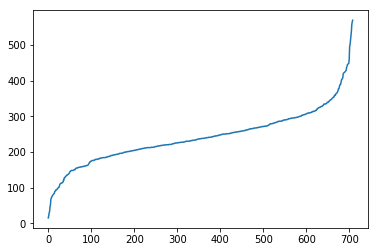

In [1]:
import matplotlib.pyplot as plt
import pickle
filename='music_dict.p'
pickle=pickle.load(open(filename,"rb"))
music_dict=pickle
#print(music_dict)
song_durations=[]
for song in music_dict:
    b=song[1][2]
    #print(b)
    song_durations.append(b)
#print(song_durations)    
plt.plot(sorted(song_durations))
plt.show()

In [35]:
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule2'
#query='DROP TABLE {}'.format(table)
query = 'CREATE TABLE {} (dow INTEGER NOT NULL,time TEXT NOT NULL,name TEXT NOT NULL, PRIMARY KEY (dow,time))'.format(table)
con.execute(query)
con.commit()
con.close()

In [15]:
import sqlite3
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
#query='DROP TABLE {}'.format(table)
query = 'CREATE TABLE {} (dow INTEGER NOT NULL,time TEXT NOT NULL,name TEXT NOT NULL)'.format(table)
con.execute(query)
con.commit()
con.close()

In [37]:
#to update table
import sqlite3
con = sqlite3.connect('soundtrack.db')
t='song_schedule'
t2='song_schedule2'
statement='INSERT INTO {} SELECT * FROM {}'.format(t2,t)
con.execute(statement)
con.commit()
con.close()

In [1]:
#check schedule
#todo: 20190530 find the three closest scheduled songs to now, replace one with a new song, 
#and move the original to nearby time slot
import sqlite3
from datetime import datetime, timedelta
con = sqlite3.connect('soundtrack.db')
table='song_schedule'
current_dow=datetime.now().strftime('%w')
current_time=datetime.now().strftime('%H:%M:%S')
end_tm=datetime.now() + timedelta(0,float(3000))
end_tm=end_tm.strftime('%H:%M:%S')
beg_tm=datetime.now() + timedelta(0,float(-3000))
beg_tm=beg_tm.strftime('%H:%M:%S')
print(current_dow,current_time)
print("Ends @ {}".format(end_tm))
statement="SELECT * FROM {} WHERE dow={} ORDER BY dow ASC, time ASC".format(table,current_dow)
cursor=con.execute(statement)
rows = cursor.fetchall()
for row in rows:
    if str(beg_tm) < row[1] < str(end_tm):
        print(row[1:3])    
con.close()

5 10:53:31
Ends @ 11:43:31
('10:15:00', 'shuffle_exclude/Radiohead_-_Weird_Fishes_Arpeggi_-_Live_From_The_Basement_HD.mp3')
('10:30:00', 'shuffle_exclude/The_Sea_and_Cake_-_These_Falling_Arms_Live_on_KEXP.mp3')
('10:37:30', 'shuffle_exclude/Benny_Goodman_Quartet_-_Moonglow_1936.mp3')
('10:45:00', 'the_sea_and_cake-3.mp3')
('11:15:00', 'shuffle_exclude/Ray_LaMontagne_-_Empty_lyrics.mp3')
('11:30:00', 'The_Sea_and_Cake_-_Jacking_the_Ball.mp3')
